# Final Project - Fundamentals of Deep Learning for NLP and CV

Congratulations! This is the final project!


## Delivery of Project

This jupyter notebook is to be delivered to evaluate your knowledge on the Deep Learning for NLP and CV module at Rumos, before date agreed with the professor. Please add your name and e-mail next.

**Student Name**: Nuno Pereira  
**E-mail**: pereiranuno88@gmail.com


## Instructions




## Details on the dataset





## Plagiarism

Always remember that you are here to learn. Discussions on the final project are highly incentivised but please do not share your work. The struggle to solve the problems is needed in order to become a true Data Scientist. By allowing others to use your code you are making the world a worse place: you are not truly helping your colleague, and you are not promoting discussions on the topic.

In case you need help, or just want to discuss some project-related topics, reach out to me either through email or through a Slack direct message.

# Objectives

Please solve the following exercises by creating a markdown cell with **# EXERCISE >>NUMBER<<**  just before you solve it (you can use the number of cells you need after that).

## Evaluation
Points (of a total of 100%):
1. 20%  
2. 20%  
3. 20%  
4. 20%  
5. 20%  

Final 5% for additional effort and conclusions beyond what was asked (give your _extra mile_).

## Important notes
1. Data Science is all about *flow*. Keep your analysis work-flow consistent.  
2. When it is requested you to *describe* something, please be 1. skeptic, 2. objective, and 3. succinct! 
3. If you don't know: search, invent, study, but please don't leave any exercise blank.

### Good luck!
# 3, 2, 1, GO! GO! GO!

---

---

### Import libraries

---

In [74]:
import pandas as pd
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns


### Constants

---

In [75]:
EPOCHS= 10
RANDOM_SEED = 42

---

In [76]:
# Global variables for reproducibility
torch.manual_seed(RANDOM_SEED)

### Load Data

---

### CIFAR-10Dataset

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class. 

<img src="images/cifar10.png" width="400" height="100">

[CIFAR 10](https://www.cs.toronto.edu/~kriz/cifar.html)

In [77]:
transform = transforms.Compose(
    [
        transforms.Resize((32,32)),
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

batch_size = 64

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=0)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=0)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


### Twitter Dataset

[Source - huggingface.co/datasets - carblacac/twitter-sentiment-analysis](https://huggingface.co/datasets/carblacac/twitter-sentiment-analysis)

In [78]:
twitter_df = pd.read_csv("data/twitter.csv", sep="\t", header=None, names=["target", "text"])
twitter_df.head()

,target,text
0,"target,text",NaN
1,"0,Starting back at work today Looks like it...",NaN
2,"1,Sugar levels dropping... munchies setting in...",NaN
3,"1,@karineb22 yeah!!! have a great summer break!",NaN
4,"1,hannah montana was very good. now going to ...",NaN


In [79]:
twitter_df.shape

(149986, 2)

---

# EXERCISE 1 - Use CIFAR10 Dataset

```classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')```

- Build a simple Neural Network without using convolutional layers to predict the image class
    - No need to configure the optimization, loss function or predict yet. Only implement the NN architecture as ```class NeuralNetwork(nn.Module)```
- Explain your choices for the model architecture e.g., activation layer, input and output

---

In [80]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        
        # Primeira camada 3 canais (RGB) *  32x32 pixels : 3072 → 768 neurónios
        self.hidden1 = nn.Linear(3*32*32, 768)
        
        # Segunda camada oculta: 768 → 384 neurónios
        self.hidden2 = nn.Linear(768, 384)
        
        # Terceira camada oculta: 384 → 192 neurónios
        self.hidden3 = nn.Linear(384, 192)
        
        # Camada de saída: 192 → 10 neurónios (correspondentes às 10 classes do CIFAR-10)
        self.out = nn.Linear(192, 10)
        
        # Dropout com probabilidade de 20% para evitar overfitting
        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        # Achatar a imagem (flatten) para vetor 1D, ada imagem passa a ser um vetor com 3072 números, pronto para entrar numa camada Linear.
        x=x.view(-1,32*32*3)
        
        # Passagem pela primeira camada com ReLU e Dropout
        x = F.relu(self.hidden1(x))
        x = self.dropout(x)
        
        # Segunda camada com ReLU e Dropout
        x = F.relu(self.hidden2(x))
        x = self.dropout(x)
        
        # Terceira camada com ReLU
        x = F.relu(self.hidden3(x))
        
        x = self.out(x)
        
        return x


A rede neural construída é composta por três camadas ocultas e uma camada de saída, desenvolvida para classificar imagens do conjunto de dados CIFAR-10. Como as imagens têm dimensão 32x32 píxeis com 3 canais (RGB), cada imagem é composta por um total de 3072 píxeis. Antes de ser processada pela rede, cada imagem é achatada e  transformando-se num vetor unidimensional com 3072 elementos, o que permite a sua passagem por camadas lineares.

A primeira camada oculta da rede transforma este vetor de 3072 valores num vetor de 768 neurónios, ao qual é aplicada a função de ativação ReLU para introduzir não-linearidade. Em seguida, é aplicado um Dropout de 20%, que desativa aleatoriamente uma parte dos neurónios durante o treino, reduzindo o risco de overfitting. Esta combinação (Linear → ReLU → Dropout) repete-se na segunda camada oculta (768 → 384 neurónios) e na terceira camada oculta (384 → 192 neurónios), mantendo a regularização e promovendo uma redução progressiva da dimensionalidade.

Por fim, a camada de saída converte os 192 neurónios da última camada oculta num vetor de 10 saídas, correspondentes às 10 classes do CIFAR-10 ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck').

---

# Exercise 2 - Use CIFAR10 Dataset
- Set the optimizer, loss function and train your model
    - Explain your choices for the optimizer and loss function
- Check the performance of your model
    - Chose the metric and explain your choice

---

In [81]:
# Instanciar o modelo
model = NeuralNetwork()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Definir a função de perda e o otimizador
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

Nesta secção, é feita a preparação do modelo para o processo de treino.

Primeiramente, a classe NeuralNetwork é instanciada, criando-se um objeto chamado model que representa a arquitetura da rede  definida anteriormente.

De seguida, é determinado o dispositivo onde o modelo será treinado. Utiliza-se a função torch.device("cuda" if torch.cuda.is_available() else "cpu"), que verifica automaticamente se existe uma placa gráfica (GPU) compatível com CUDA disponível. Se existir, o modelo será treinado na GPU, o que acelera significativamente o processo; caso contrário, o treino decorre no processador (CPU).


Depois, define-se a função de perda (loss function), que neste caso é a CrossEntropyLoss. Esta função foi escolhida tendo em conta que temos um problema de classificação multiclasse, como é o caso do CIFAR-10.

Por fim, é criado o otimizador, que neste caso é o Adam. É inicializado com os parâmetros do modelo (model.parameters()) e com uma taxa de aprendizagem (learning rate) de 0.001, que controla o quão rapidamente os pesos da rede são ajustados durante o treino.

In [82]:
def train_model(model, dataloader, optimizer, loss_fn, device):
    model.train()
    total_loss = 0

    for batch_idx, (inputs, targets) in enumerate(dataloader):
        inputs, targets = inputs.to(device), targets.to(device)

        outputs = model(inputs)
        loss = loss_fn(outputs, targets)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    average_loss = total_loss / len(dataloader)
    return average_loss

A função `train_model`  recebe como argumentos o modelo, o dataloader (que fornece os dados em lotes), o otimizador, a função de perda e o dispositivo onde os cálculos devem ser realizados (CPU ou GPU).

O primeiro passo é colocar o modelo em modo de treino através de model.train(). Este modo ativa componentes como o Dropout, caso existam, garantindo que o comportamento do modelo é o apropriado para a fase de aprendizagem.

De seguida, é inicializada uma variável total_loss que irá acumular o valor da perda (erro) ao longo de todos os lotes processados.

O ciclo principal da função percorre o dataloader, recebendo os dados (inputs) e os rótulos correspondentes (targets) em cada iteração. 

As previsões são comparadas com as labels reais através da função de perda (loss_fn), que calcula o erro cometido.

Antes de atualizar os pesos do modelo, é necessário limpar os gradientes anteriores com optimizer.zero_grad(). 
Depois disso, realiza-se a propagação para trás (backward pass), onde os gradientes do erro em relação aos pesos são calculados com loss.backward(). Finalmente, o otimizador atualiza os pesos da rede com optimizer.step().


No final  a função calcula a perda média dividindo a perda acumulada pelo número total de lotes, e devolve esse valor.

In [83]:
def evaluate_model(model, dataloader, loss_fn, device):
    model.eval()
    total_loss = 0
    total_correct = 0
    total_samples = 0

    with torch.no_grad():
        for inputs, targets in dataloader:
            inputs, targets = inputs.to(device), targets.to(device)

            outputs = model(inputs)
            loss = loss_fn(outputs, targets)
            total_loss += loss.item()

            predictions = outputs.argmax(dim=1)
            total_correct += (predictions == targets).sum().item()
            total_samples += targets.size(0)

    avg_loss = total_loss / len(dataloader)
    accuracy = 100 * total_correct / total_samples
    return avg_loss, accuracy


A função `evaluate_model` serve para avaliar o desempenho do modelo sobre o conjunto de dados. Esta função recebe como argumentos o modelo a avaliar, o dataloader com os dados a testar, a função de perda utilizada e o dispositivo onde os cálculos devem ser realizados (CPU ou GPU).

São depois inicializadas três variáveis: total_loss, para acumular o valor total da perda; total_correct, que conta quantas previsões foram corretas; e total_samples, que regista o número total de amostras avaliadas.

O bloco with torch.no_grad() é utilizado para garantir que o PyTorch não calcula nem guarda gradientes durante esta fase, o que melhora o desempenho e reduz o uso de memória, já que não há necessidade de retropropagação nesta etapa.

O ciclo for percorre todos os lotes de dados no dataloader. Para cada lote, os dados (inputs) e os rótulos verdadeiros (targets) são enviados para o dispositivo apropriado (GPU ou CPU).


As previsões são depois convertidas nas classes previstas pelo modelo, utilizando argmax(dim=1), que seleciona o índice com maior valor de saída (ou seja, a classe mais provável). A função compara estas previsões com os rótulos verdadeiros para contar quantas previsões foram corretas, incrementando total_correct. O número de amostras do lote é igualmente somado ao contador total_samples.

Após o ciclo, é calculada a perda média, dividindo o valor total da perda pelo número de lotes (len(dataloader)). A métrica Accuracy  é calculada como a percentagem de previsões corretas em relação ao total de amostras avaliadas.


In [84]:
def train_and_evaluate(model, trainloader, testloader, optimizer, criterion, device, epochs=5):
    for epoch in range(epochs):
        print(f"Epoch {epoch + 1}/{epochs}")

        train_loss = train_model(model, trainloader, optimizer, criterion, device)
        val_loss, val_acc = evaluate_model(model, testloader, criterion, device)

        print(f"  → Train Loss: {train_loss:.4f}")
        print(f"  → Validation Loss: {val_loss:.4f} | Accuracy: {val_acc:.2f}%\n")

    print("Training completed!")

A função `train_and_evaluate` é responsável por treinar e avaliar um modelo ao longo das várias epochs. 

A variável epochs define o número total de iterações a realizar. Durante cada iteração, são chamadas duas funções principais: `train_model` e `evaluate_model` que foram descritas nas células anteriores

In [85]:
train_and_evaluate(model, trainloader, testloader, optimizer, criterion, device, EPOCHS)

Epoch 1/10
  → Train Loss: 1.7082
  → Validation Loss: 1.5577 | Accuracy: 44.08%

Epoch 2/10
  → Train Loss: 1.5275
  → Validation Loss: 1.4527 | Accuracy: 49.02%

Epoch 3/10
  → Train Loss: 1.4439
  → Validation Loss: 1.4184 | Accuracy: 50.25%

Epoch 4/10
  → Train Loss: 1.3771
  → Validation Loss: 1.3928 | Accuracy: 51.17%

Epoch 5/10
  → Train Loss: 1.3264
  → Validation Loss: 1.3590 | Accuracy: 51.80%

Epoch 6/10
  → Train Loss: 1.2728
  → Validation Loss: 1.3452 | Accuracy: 52.57%

Epoch 7/10
  → Train Loss: 1.2329
  → Validation Loss: 1.3329 | Accuracy: 53.17%

Epoch 8/10
  → Train Loss: 1.1883
  → Validation Loss: 1.3276 | Accuracy: 53.62%

Epoch 9/10
  → Train Loss: 1.1521
  → Validation Loss: 1.3317 | Accuracy: 53.06%

Epoch 10/10
  → Train Loss: 1.1148
  → Validation Loss: 1.3209 | Accuracy: 54.90%

Training completed!


Ao analisar os resultados desta primeira rede do projeto de Computer Vision, observa-se um comportamento típico de um modelo simples que consegue aprender os padrões dos dados de treino, mas com limitações na capacidade de generalização. Ao longo das 10 iterações, a perda de treino (Train Loss) reduz-se de forma progressiva e consistente, passando de 1.71 na primeira iteração para 1.11 na décima. Este comportamento é esperado e indica que o modelo está a conseguir ajustar-se aos dados que lhe são fornecidos para treino.

Contudo, a perda de validação (Validation Loss), apesar de apresentar também uma ligeira descida, tende a estabilizar a partir da oitava iteração. A melhoria torna-se cada vez menos significativa, sugerindo que o modelo começa a atingir um limite na sua capacidade de generalizar para dados que não viu anteriormente. Paralelamente, a accuracy nos dados de validação sobe de 44.08% na primeira época para 54.90% na última, o que representa uma melhoria gradual, mas com ganhos marginais nas últimas iterações.

Este desempenho está de acordo com o que se espera de redes mais simples, que têm um poder de generalização mais limitado. A ausência de mecanismos que capturem padrões espaciais complexos (como os presentes nas imagens) justifica a estabilização da performance. Além disso, os resultados sugerem um início de ligeiro overfitting, já que o modelo continua a melhorar nos dados de treino, mas não consegue traduzir esse ganho nos dados de validação.

In [86]:
def evaluate_by_class(model, dataloader, loss_fn, device, class_names):
    model.eval()

    total_loss = 0  # Acumula a perda total
    correct_per_class = [0 for _ in range(len(class_names))]  # Contador de previsões corretas por classe
    total_per_class = [0 for _ in range(len(class_names))]    # Total de amostras por classe

    # Desativa o cálculo de gradientes (não é necessário na avaliação)
    with torch.no_grad():
        for inputs, targets in dataloader:
            inputs, targets = inputs.to(device), targets.to(device)

            # Forward pass
            outputs = model(inputs)
            loss = loss_fn(outputs, targets)
            total_loss += loss.item()

            # Aplica Softmax apenas para obter probabilidades (não afeta as previsões)
            probs = F.softmax(outputs, dim=1)
            preds = torch.argmax(probs, dim=1)  # Previsão = índice da maior probabilidade

            # Conta as previsões corretas por classe
            for i in range(len(targets)):
                label = targets[i].item()
                prediction = preds[i].item()
                total_per_class[label] += 1
                if prediction == label:
                    correct_per_class[label] += 1

    # Calcula a perda média global
    avg_loss = total_loss / len(dataloader)

    # Mostra os resultados por classe
    print(f"\n Avaliação por classe:")
    for i, class_name in enumerate(class_names):
        if total_per_class[i] > 0:
            acc = 100 * correct_per_class[i] / total_per_class[i]
            print(f"  Classe '{class_name}': {acc:.2f}% ({correct_per_class[i]} / {total_per_class[i]})")
        else:
            print(f"  Classe '{class_name}': sem dados")

    # Acurácia geral
    overall_accuracy = 100 * sum(correct_per_class) / sum(total_per_class)
    print(f"\n Global Accuracy: {overall_accuracy:.2f}%")
    print(f" Average Loss: {avg_loss:.4f}")


A função `evaluate_by_class` tem como objetivo avaliar o desempenho de classificação do modelo por classe, ou seja, determinar a capacidade de classificação individual de cada uma das classes.

O processo começa por colocar o modelo em modo de avaliação com model.eval(), o que garante que camadas como Dropout ou BatchNorm se comportem corretamente durante a fase de teste. Em seguida, são criadas duas listas: uma para contar o número de previsões corretas por classe e outra para contabilizar o total de amostras avaliadas por classe.

Durante a avaliação, utiliza-se o contexto torch.no_grad() para desativar o cálculo de gradientes, o que reduz o uso de memória e acelera o processo, uma vez que não há necessidade de retropropagação. O modelo percorre o conjunto de dados (dataloader) e, para cada batch, realiza a passagem para a frente (forward pass) para gerar as previsões. A perda é calculada usando a função de custo (loss_fn) e somada à perda total.

De seguida, aplica-se a função Softmax para converter as saídas do modelo em probabilidades (embora isto seja apenas para interpretação). 


In [87]:
evaluate_by_class(model, testloader, criterion, device, classes)


 Avaliação por classe:
  Classe 'plane': 60.30% (603 / 1000)
  Classe 'car': 68.80% (688 / 1000)
  Classe 'bird': 32.40% (324 / 1000)
  Classe 'cat': 40.00% (400 / 1000)
  Classe 'deer': 52.70% (527 / 1000)
  Classe 'dog': 43.30% (433 / 1000)
  Classe 'frog': 62.10% (621 / 1000)
  Classe 'horse': 59.80% (598 / 1000)
  Classe 'ship': 73.50% (735 / 1000)
  Classe 'truck': 56.10% (561 / 1000)

 Global Accuracy: 54.90%
 Average Loss: 1.3209


Com base nos resultados da avaliação por classe, é possível observar que o desempenho do modelo treinado sobre o conjunto CIFAR-10 não é uniforme entre as diferentes categorias. A precisão global do modelo é de ~54%, o que representa um desempenho razoável tendo em conta que se trata de uma rede relativamente simples. A perda média de 1.3 reforça a ideia de que o modelo ainda comete erros significativos, embora já consiga aprender padrões úteis.

Algumas classes, como 'ship', 'frog', 'car' e 'plane', apresentam previsões superiores a 60%, o que demonstra que o modelo consegue reconhecer bem objetos com formas mais distintas e características visuais marcantes. Por outro lado, classes como 'dog' (~40%) e 'bird' (~30%) revelam desempenhos mais fracos, o que pode dever-se à maior complexidade visual destas imagens ou à semelhança entre categorias, como por exemplo entre cães e gatos.

Este padrão sugere que o modelo tem maior facilidade em distinguir veículos (como 'ship', 'truck' ou 'car') do que animais.

Em suma, o modelo apresenta resultado razoável, mas desempenho inconsistente entre classes, destacando a importância de se aplicar estratégias adicionais para melhorar a capacidade de generalização, sobretudo em classes visualmente mais complexas.

In [88]:
def show_predictions(model, dataloader, class_names, device, num_images=20):
    model.eval()  # Define o modelo para modo de avaliação (desativa dropout, batch norm)
    images_shown = 0  # Contador de imagens exibidas
    plt.figure(figsize=(15, 8))  # Configuração do tamanho do gráfico

    with torch.no_grad():  # Desativa cálculo de gradientes 
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)  # Move dados para a GPU/CPU conforme necessário
            outputs = model(inputs)  # Obtém previsões do modelo
            preds = torch.argmax(outputs, dim=1)  # Converte probabilidades para rótulos de classe

            for i in range(len(inputs)):  # Itera sobre cada imagem no lote atual
                if images_shown >= num_images:
                    break  # Para o loop se o número desejado de imagens já foi mostrado

                image = inputs[i].cpu().permute(1, 2, 0)  # Converte formato [C, H, W] para [H, W, C] para exibição
                image = image * 0.5 + 0.5  # Ajuste para desfazer normalização (-1 a 1 → 0 a 1)

                plt.subplot(4, 5, images_shown + 1)  # Organiza imagens em um grid de 4x5
                plt.imshow(image)  # Exibe a imagem
                pred_label = class_names[preds[i]]  # Obtém o nome da classe prevista
                true_label = class_names[labels[i]]  # Obtém o nome da classe verdadeira
                color = 'green' if preds[i] == labels[i] else 'red'  # Define a cor do título com base na correção da previsão
                plt.title(f"P: {pred_label}\nV: {true_label}", color=color, fontsize=9)  # Exibe previsões e valores reais
                plt.axis('off')  # Remove eixos para melhor visualização
                images_shown += 1  # Incrementa contador de imagens exibidas

            if images_shown >= num_images:
                break  # Certifica-se de que não exibe imagens além do necessário

    plt.suptitle("Previsões do Modelo (P = Previsto, V = Verdadeiro)", fontsize=14)  # Título geral do gráfico
    plt.tight_layout()  # Ajusta layout para evitar sobreposição de elementos
    plt.show()  # Exibe o gráfico final


A função `show_predictions` tem como objetivo visualizar de forma gráfica as previsões feitas pelo modelo, comparando os rótulos previstos com os rótulos reais, através de um conjunto de imagens retiradas do conjunto de teste. Assim desta forma conseguimos  perceber visualmente onde o modelo acerta e onde se engana. 

O processo começa por colocar o modelo em modo de avaliação com model.eval(), o que garante que camadas como Dropout ou Batch Normalization não introduzam aleatoriedade durante as previsões. Em seguida, a função entra num ciclo sem cálculo de gradientes (torch.no_grad()), o que reduz o uso de memória e acelera a execução, visto que não é necessário realizar retropropagação.

Para cada batch de imagens e respetivos rótulos, as imagens são enviadas para o device (CPU ou GPU), tal como os rótulos verdadeiros. O modelo calcula os outputs (logits), e a previsão final para cada imagem é obtida através da operação argmax, que devolve o índice da classe com maior probabilidade.

Cada imagem do lote é então formatada para visualização convertendo de [Chanel, Height, Width] (formato que o PyTorch usa internamente, porque é mais eficiente para cálculos em GPU) para [Height, Width, Chanel] (formato que permite que a imagem seja desenhada corretamente pelo imshow() com as cores nas posições certas no matpotlib). A imagem é desenhada com matplotlib, sendo exibido por cima o nome da classe prevista (P) e o nome da classe verdadeira (V). Se a previsão estiver correta, o título aparece a verde; caso contrário, aparece a vermelho — uma forma visual imediata de distinguir acertos de erros.


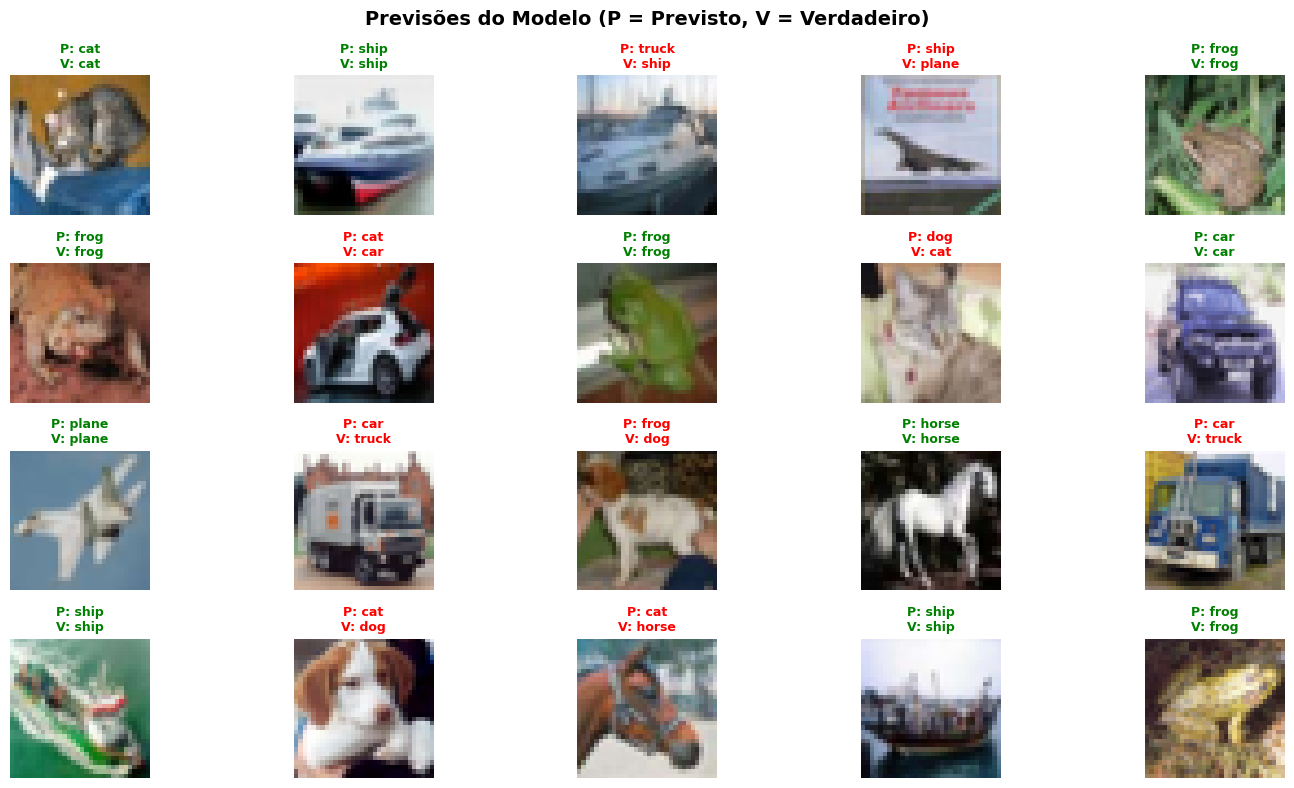

In [89]:
show_predictions(model, testloader, classes, device, num_images=20)

Ao observar os exemplos exibidos, nota-se que o modelo consegue realizar previsões corretas para uma diversidade considerável de imagens, como são exemplos imagens das classes 'cat', 'frog', 'plane', 'car', 'ship', o que sugere que o modelo aprendeu a reconhecer padrões visuais relevantes. 
Contudo, também se verificam várias previsões incorretas. Por exemplo, 'truck' foi previsto numa imagem do tipo 'ship', ou 'dog' como 'cat', entre outros casos. Estas confusões indicam que o modelo ainda tem dificuldade em distinguir classes com características visuais semelhantes ou em imagens mais ambíguas.

No geral, esta visualização evidencia o que já tinhamos visto anteriormente em que o modelo tem alguma uma capacidade de preditiva, mas ainda comete erros previsíveis em classes semelhantes entre si. 

In [90]:
def plot_confusion_matrix(model, dataloader, class_names, device):
    model.eval()
    all_preds = []
    all_targets = []

    with torch.no_grad():
        for inputs, targets in dataloader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            preds = torch.argmax(outputs, dim=1)

            all_preds.extend(preds.cpu().numpy())
            all_targets.extend(targets.cpu().numpy())

    # Matriz de confusão
    cm = confusion_matrix(all_targets, all_preds)

    # Cria máscara para a parte superior (triângulo superior)
    mask = np.triu(np.ones_like(cm, dtype=bool))

    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greys',
                xticklabels=class_names,
                yticklabels=class_names,
                mask=mask, linewidths=0.5)

    plt.xlabel('Classe Prevista')
    plt.ylabel('Classe Verdadeira')
    plt.title('Matriz de Confusão')
    plt.tight_layout()
    plt.show()

A função `plot_confusion_matrix` tem como objetivo visualizar graficamente a matriz de confusão de um modelo de classificação, de forma a avaliar o desempenho do mesmo na distinção entre diferentes classes. Esta análise permite perceber quais as classes são mais frequentemente confundidas entre si.

Durante a iteração sobre o dataloader, a função envia as imagens (inputs) e os rótulos verdadeiros (targets) para o dispositivo apropriado (CPU ou GPU). O modelo faz a previsão para cada lote de imagens e a classe prevista é obtida através da função argmax, que seleciona o índice da classe com maior probabilidade para cada imagem. As previsões e os rótulos reais são acumulados em duas listas.

Depois de recolhidas todas as previsões e rótulos, a função calcula a matriz de confusão comparando os rótulos verdadeiros com os rótulos previstos, contando quantas vezes cada classe foi corretamente ou incorretamente identificada.

Para tornar a visualização mais limpa e evitar duplicação de informação (uma vez que a matriz de confusão é simétrica), é aplicada uma máscara à parte superior da matriz com np.triu

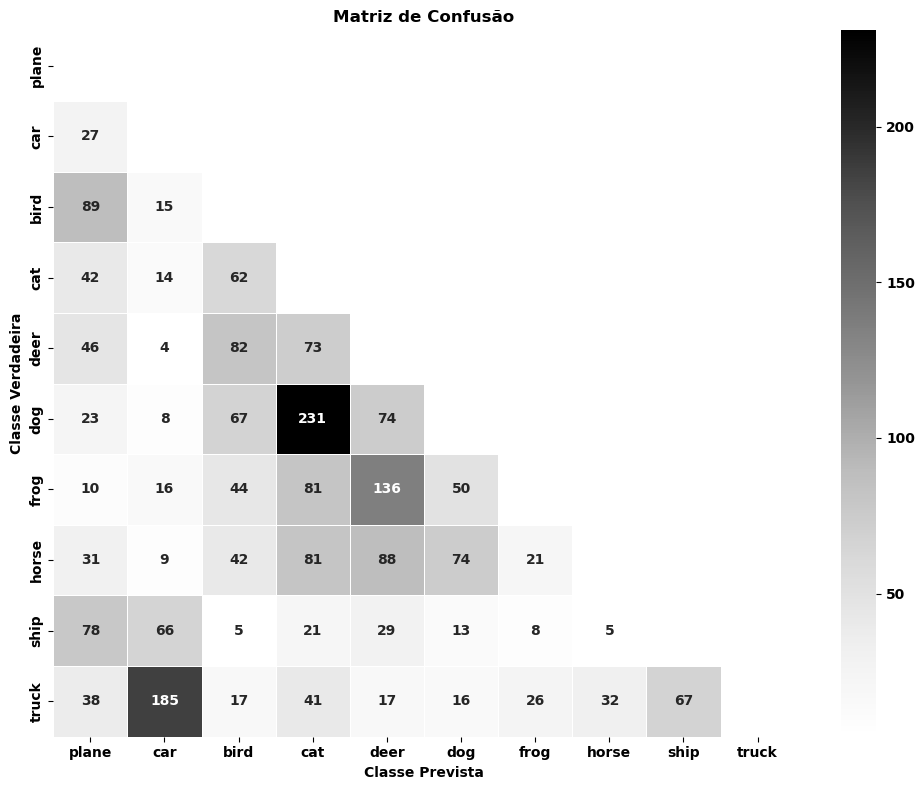

In [91]:
plot_confusion_matrix(model, testloader, classes, device)

Verificando a matriz de confusão resultante da rede revela graves limitações na capacidade do modelo distinguir entre classes, sobretudo entre classes que partilham formas ou contextos semelhantes.

Uma das observações mais marcantes da matriz é a confusão extremamente elevada entre as classes "dog" e "cat". O modelo previu a classe "cat" em 231 casos onde a classe verdadeira era "dog", o que representa um erro severo e recorrente. Este tipo de confusão é esperado em redes mais simples, uma vez que cães e gatos podem partilhar muitos atrubutos, tais como:  cores, poses e cenários semelhantes e sem a capacidade de extrair características espaciais, o modelo não consegue distinguir bem entre eles.

Confusões semelhantes ocorrem entre "car" e "truck" (com 185 erros), estes erros  sugerem que o modelo identifica mal veículos ou objetos com contornos parecidos, provavelmente devido à ausência de mecanismos de detecção de forma e contexto, que são características naturais de redes convolucionais.

A distribuição geral dos erros revela que as previsões estão espalhadas por várias classes, o que indica baixa confiança e fraca capacidade de generalização. 

---

# Exercise 3 - Use CIFAR10 Dataset
- Same as Exercise 1 but now add Convolutional Layers
- Explain your choices for the model architecture e.g., activation layer, input and output

---

In [92]:
class CNNModelConv(nn.Module):
    def __init__(self):
        super().__init__()
        
        # Camada convolucional 1
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        
        # Camada convolucional 2
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1)
        self.conv4 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1)
        
        # Camadas totalmente ligadas
        self.fc1 = nn.Linear(in_features=128 * 8 * 8, out_features=256)
        self.fc2 = nn.Linear(in_features=256, out_features=10)

        # Dropout para regularização
        self.dropout = nn.Dropout(p=0.25)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = self.pool(x)

        x = F.relu(self.conv3(x))
        x = F.relu(self.conv4(x))
        x = self.pool(x)

        x = x.view(x.size(0), -1)  # Flatten
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.fc2(x)
        return x

A arquitetura `CNNModelConv` inicia-se com duas camadas  convolucionais seguidos de camadas totalmente ligadas (fully connected)
No primeiro bloco, aplicam-se duas camadas convolucionais: a primeira transforma a imagem de entrada, com três canais de cor (RGB), utilizando 32 filtros de convolução com tamanho 3x3 e padding de 1 para manter as dimensões. A segunda camada convolucional aplica 64 filtros sobre essa saída. De seguida, aplica-se uma operação de max pooling com janela de 2x2, que reduz a dimensão espacial pela metade (de 32x32 para 16x16), preservando a informação mais relevante.

O segundo bloco convolucional repete esta lógica, agora com duas camadas convolucionais que utilizam 128 filtros cada, mantendo o tamanho do kernel em 3x3. Após estas camadas, é novamente aplicada uma operação de max pooling, reduzindo as dimensões para 8x8.

A saída dos blocos convolucionais é então achatada (flatten) para um vetor de características que alimenta as camadas totalmente ligadas. A primeira camada densa possui 256 unidades, seguida de uma operação de dropout com uma taxa de 25%, o que ajuda a prevenir o sobreajuste (overfitting). A última camada tem 10 neurónios, correspondendo às 10 classes do problema de classificação. Todas as camadas convolucionais e densas utilizam a função de ativação ReLU para introduzir não linearidade no modelo.

---

# Exercise 4 - Use CIFAR10 Dataset
- Same as Exercise 2 but for the CNN arquitecture (model from Exercise 3)

- Set the optimizer, loss function and train your model
    - Explain your choices for the optimizer and loss function
- Check the performance of your model
    - Chose the metric and explain your choice

---

In [93]:
# Instanciar o modelo
model = CNNModelConv().to(device)

In [94]:
# Definir a função de perda e o otimizador
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

À semelhança do exercicio  2, é mantido  a mesmas funções de perda e otimizador, porque a natureza do problema é o mesmo,  um problema de classificação multiclasse.

In [95]:
train_and_evaluate(model, trainloader, testloader, optimizer, criterion, device, EPOCHS)

Epoch 1/10
  → Train Loss: 1.3726
  → Validation Loss: 1.0812 | Accuracy: 61.73%

Epoch 2/10
  → Train Loss: 0.9107
  → Validation Loss: 0.7804 | Accuracy: 72.71%

Epoch 3/10
  → Train Loss: 0.7179
  → Validation Loss: 0.7312 | Accuracy: 74.55%

Epoch 4/10
  → Train Loss: 0.5855
  → Validation Loss: 0.6824 | Accuracy: 76.61%

Epoch 5/10
  → Train Loss: 0.4769
  → Validation Loss: 0.7863 | Accuracy: 74.29%

Epoch 6/10
  → Train Loss: 0.3934
  → Validation Loss: 0.6971 | Accuracy: 78.07%

Epoch 7/10
  → Train Loss: 0.3169
  → Validation Loss: 0.7351 | Accuracy: 77.93%

Epoch 8/10
  → Train Loss: 0.2570
  → Validation Loss: 0.7782 | Accuracy: 77.88%

Epoch 9/10
  → Train Loss: 0.2199
  → Validation Loss: 0.8645 | Accuracy: 76.39%

Epoch 10/10
  → Train Loss: 0.1848
  → Validation Loss: 0.8995 | Accuracy: 77.55%

Training completed!


Os resultados demonstram que o modelo convolucional apresenta uma evolução significativa nas primeiras iterações de treino, tanto ao nível da redução da perda (loss) como do aumento da accuracy sobre o conjunto de validação.

Durante as primeiras cinco iterações, há uma melhoria clara: a perda de treino desce de 1.37 para 0.47, e a perda de validação diminui de 1.08 para 0.78, acompanhada por um aumento da precisão de 61% para 74%. Esta evolução mostra que o modelo está a aprender os padrões do conjunto de dados, generalizando relativamente bem para os dados de validação.

A partir da setima iteração, embora a perda de treino continue a descer  (indicando que o modelo continua a ajustar-se aos dados de treino), a perda de validação começa a estabilizar e depois a aumentar ligeiramente. Após isso, a precisão estabiliza, ao passo que a perda de validação continua a subir — terminando nos 0.8995 na décima iteração .

Este comportamento é característico de um início de sobreajustamento (overfitting): o modelo continua a melhorar nos dados de treino, mas começa a perder capacidade de generalização nos dados de teste. 

In [96]:
evaluate_by_class(model, testloader, criterion, device, classes)


 Avaliação por classe:
  Classe 'plane': 84.80% (848 / 1000)
  Classe 'car': 86.70% (867 / 1000)
  Classe 'bird': 68.00% (680 / 1000)
  Classe 'cat': 63.00% (630 / 1000)
  Classe 'deer': 73.20% (732 / 1000)
  Classe 'dog': 73.40% (734 / 1000)
  Classe 'frog': 79.70% (797 / 1000)
  Classe 'horse': 74.20% (742 / 1000)
  Classe 'ship': 85.70% (857 / 1000)
  Classe 'truck': 86.80% (868 / 1000)

 Global Accuracy: 77.55%
 Average Loss: 0.8995


Os resultados da avaliação por classe revelam um desempenho muito equilibrado e robusto do modelo convolucional, com uma taxa de acccuracy global de 77,5% e uma perda média de 0.89 . Estes valores refletem uma capacidade significativa do modelo para generalizar.

Analisando classe a classe, observa-se que as categorias com melhor desempenho são 'truck' (86%), 'ship' (85%), 'car' (86%), 'plane' (84%). 

Por outro lado, as classes com menor taxa de precisão — nomeadamente 'bird' (68%), 'cat' (63%) e 'dog' (73%) — são aquelas provavelmente com maior variabilidade visual e semelhanças entre si, o que pode dificultar a tarefa de classificação. Ainda assim, os valores obtidos nestas classes são positivos e revelam que o modelo consegue extrair padrões relevantes mesmo em classes mais desafiantes.

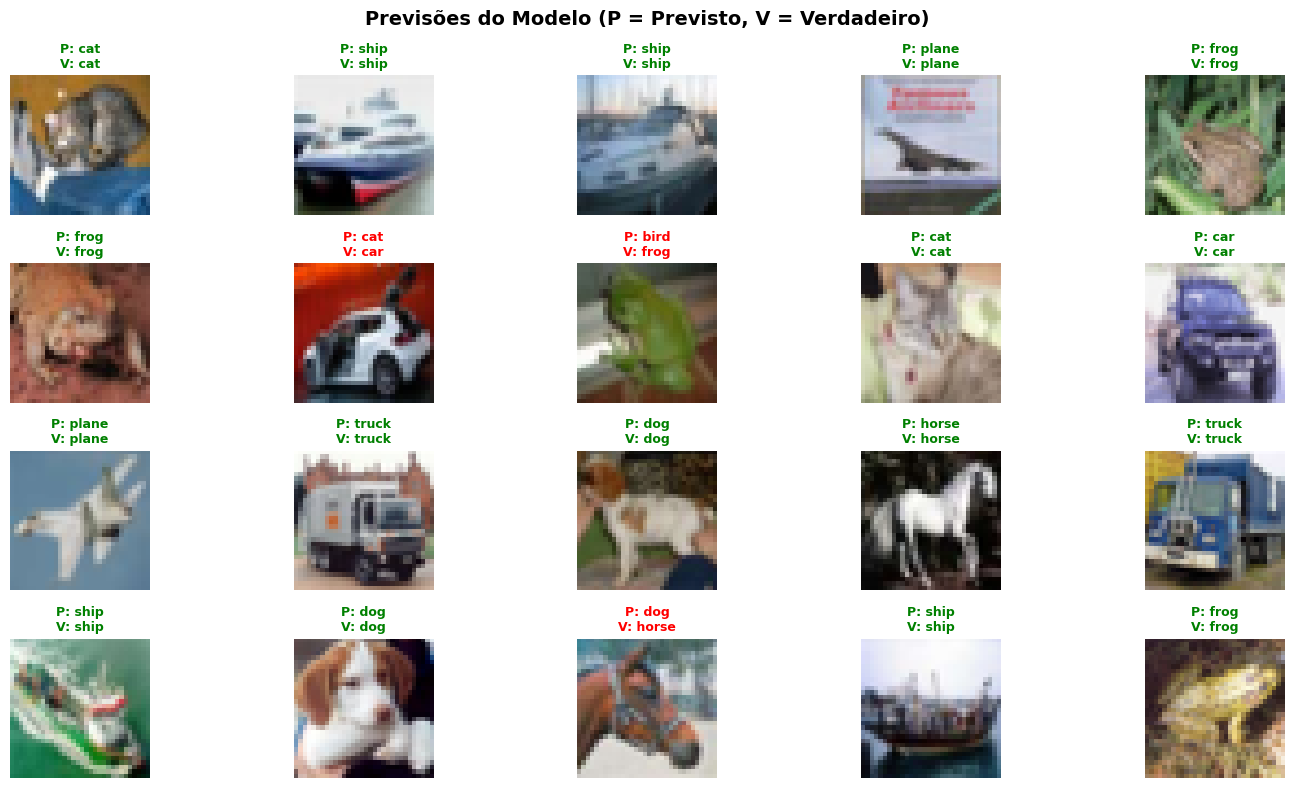

In [97]:
show_predictions(model, testloader, classes, device, num_images=20)

A visualização das previsões reforça o resultado quantitativo observado anteriormente: a rede com camadas convolucionais apresenta um modelho  desempenho e mais consistente na tarefa de classificação. A maioria do set de imagens testes é reconhecida corretamente portanto  o modelo mostra-se mais robusto na capacidade preditivia.



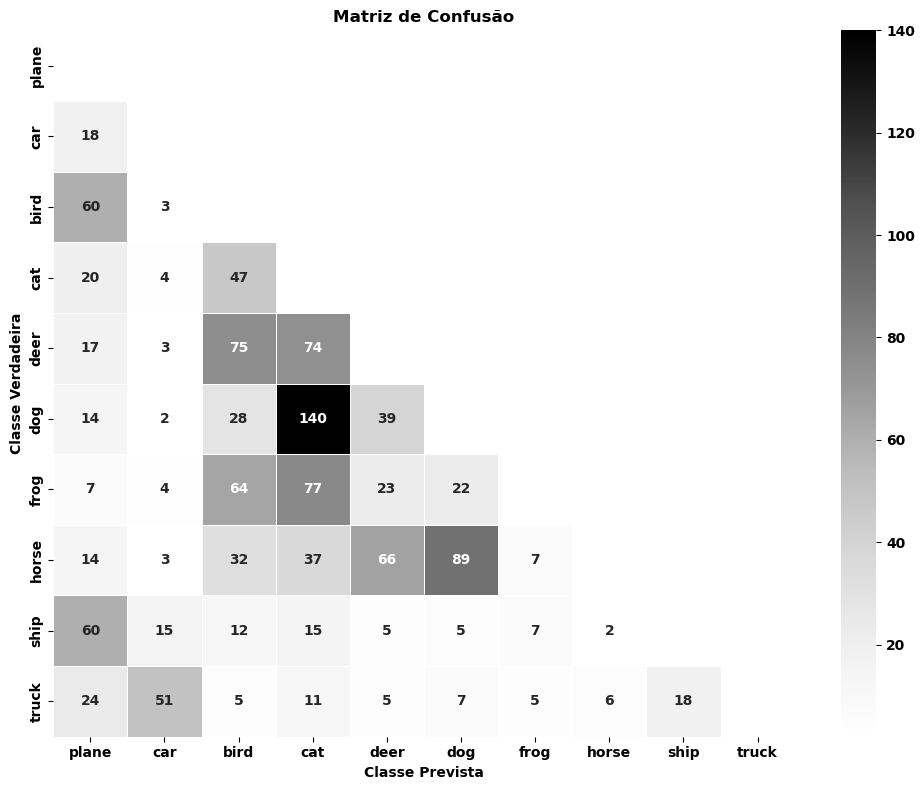

In [98]:
plot_confusion_matrix(model, testloader, classes, device)

A matriz de confusão evidencia que, embora o modelo apresente uma melhor capacidade para distinguir corretamente várias classes do conjunto CIFAR-10, ainda existem erros de classificação significativos, particularmente entre classes com características visuais semelhantes.

Um dos aspetos mais marcantes da matriz é a confusão entre as classes “dog” e “cat”. Concretamente, o modelo classificou incorretamente 140 imagens da classe “dog” como “cat”, o que representa um dos maiores erros individuais observados. Esta situação sugere que o modelo tem dificuldade em distinguir estes dois animais, possivelmente devido a semelhanças nas imagens, como poses, cores ou contextos comuns (ex: fotografias em casa ou em ambientes naturais com fundos semelhantes).

Após esta análise verifica-se que esta arquitectura apresenta claramente um melhor resultado que a arquitectura anterior, no entanto sugere que a capacidade de generalização do modelo ainda poderia ser melhorada pelos erros exemplificados.

---

# Exercise 5 - Use Twitter Dataset
For the **Text DATA TODO**

- Build a Supervised Classification model
- Explain your choices for preparing the text for the model

---

In [99]:
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
from torch.nn.utils.rnn import pad_sequence
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
import time
import matplotlib.pyplot as plt
import numpy as np

In [100]:
twitter_df = pd.read_csv("data/twitter.csv", sep=",", header=0)
twitter_df.sample(10)

,target,text
123128,1,D-Day Jay-z Honduras #Phish Palm Pre Launch Ve...
67917,1,Going to bed now.feeling rubbish in quite a fe...
19255,0,thinks singerr sucks!
99913,1,So happy for my mum! She won a holiday package...
19469,0,Had a blast at school today with the rest of t...
100595,0,@MissMileysFan1 ahhh!! im so excited. tho it k...
143065,1,@mossyrants Its a boss name. Never heard it as...
28268,0,Waiting for my midnight snack to digest...Bloo...
22243,0,@BlazinSquadNEws oh no i`m sorry for you. i h...
131266,0,@whiskey_kitten www.Pandora.com - plays music ...


In [101]:
twitter_df= twitter_df.sample(frac=1)

In [102]:
print(twitter_df.isnull().sum())

target    0
text      0
dtype: int64


In [103]:
twitter_df = twitter_df.dropna()  # remover linhas nulas, se existirem

A linha abaixo tem como objetivo criar uma função de tokenização simples que será utilizada para transformar frases em listas de palavras individuais, também chamadas de tokens. A tokenização permite que os modelos NLP trabalhem sobre palavras separadas em vez de textos contínuos. Tendo em conta que o dataset é composto por tweets onde o não é necessário um processamento linguistico muito produndo, escolhi o método "basic_english" como método de tokenização, por ser uma abordagem muito leve e rápida, este tokenizador converte todo o texto para letras minúsculas e separa as palavras com base nos espaços e nos sinais de pontuação mais comuns. 

In [104]:
tokenizer = get_tokenizer("basic_english")

Neste bloco de código, começamos por definir uma função `yield_tokens`, que percorre o dataframe dos tweets e aplica o tokenizador definido no bloco anterior a cada linha de texto. Este tokenizador transforma as frases em listas de palavras (tokens), respeitando a sequência e separação natural da linguagem. Em vez de guardar todos os tokens na memória, a função usa a instrução yield, permitindo que os tokens sejam geridos de forma eficiente e iteráveis.

De seguida, o vocabulário é construído através da função `build_vocab_from_iterator`, que recebe os tokens gerados e cria um mapeamento entre cada palavra única e um número inteiro correspondente. Durante esta construção, são também adicionados dois tokens especiais: (pad)(padding), utilizado para preencher as sequências mais curtas durante o batching de forma que no final todos os tweets tenham o mesmo comprimento de forma a ser agrupados num tensor, e (unk)(unknow), que representa todas as palavras desconhecidas que possam aparecer em novos dados.

Este processo é fundamental para transformar o texto bruto dos tweets em representações numéricas que podem ser compreendidas e processadas pelo modelo.

In [ ]:
#construi vocabulário
def yield_tokens(dataframe):
    for text in dataframe["text"]:
        yield tokenizer(text)

vocab = build_vocab_from_iterator(yield_tokens(twitter_df), specials=["<pad>", "<unk>"])
vocab.set_default_index(vocab["<unk>"])
pad_idx = vocab["<pad>"]

A classe __TweetDataset__ foi criada para organizar o conjunto de dados de tweets de forma compatível com o DataLoader da PyTorch. Esta classe recebe o dataframe, o vocabulário e o tokenizador como argumentos, permitindo transformar cada tweet num vetor de inteiros correspondente aos seus tokens. A função `getitem` trata de tokenizar o texto, converter cada token no seu índice do vocabulário e transformar a label associada ao tweet num tensor de tipo float, necessário para tarefas de classificação binária. Como os tweets têm comprimentos variáveis, foi também implementada uma função `collate_batch`, que garante que todos os exemplos de um batch têm o mesmo tamanho, aplicando padding automático. Esta função agrupa os textos, os rótulos e as respetivas comprimentos num único batch formatado para ser enviado ao modelo. Esta preparação é essencial para que o treino seja eficiente e sem erros, respeitando a estrutura variável dos dados textuais.

In [106]:
class TweetDataset(Dataset):
    def __init__(self, dataframe, vocab, tokenizer):
        self.dataframe = dataframe
        self.vocab = vocab
        self.tokenizer = tokenizer

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        text = self.dataframe.iloc[idx]["text"]
        label = self.dataframe.iloc[idx]["target"]  # <- corrigido aqui!
        tokens = self.tokenizer(text)
        token_ids = torch.tensor([self.vocab[token] for token in tokens], dtype=torch.long)
        label = torch.tensor(label, dtype=torch.float)
        return token_ids, label

def collate_batch(batch):
    text_list, label_list, lengths = [], [], []
    for text, label in batch:
        text_list.append(text)
        label_list.append(label)
        lengths.append(len(text))
    padded_texts = pad_sequence(text_list, batch_first=True, padding_value=pad_idx)
    labels = torch.stack(label_list)
    lengths = torch.tensor(lengths)
    return padded_texts, labels, lengths

Para treinar e validar o modelo de forma eficaz, o conjunto de dados twitter_df foi dividido em dois subconjuntos: 80% para treino e 20% para validação. Esta divisão foi feita utilizando a função `train_test_split` da biblioteca sklearn, garantindo ainda a reprodutibilidade dos resultados ao fixar a seed (random_state=42).

Depois da divisão, foram criados dois objetos TweetDataset: um para os dados de treino (train_dataset) e outro para os dados de validação (valid_dataset). Cada um destes objetos prepara os textos e os rótulos para serem consumidos pelo modelo, aplicando o tokenizador e o mapeamento para índices do vocabulário.

Para alimentar o modelo durante o treino e a validação, foram definidos dois DataLoader: train_loader e valid_loader. O train_loader carrega os dados em batches de 256 amostras, aplicando uma aleatorização de ordenação (shuffle=True) para garantir que o modelo não aprenda padrões artificiais baseados na ordem dos dados. Já o valid_loader carrega os dados também em batches de 256 amostras, mas sem  aleatorização de ordenação (shuffle=False), preservando a ordem dos exemplos durante a avaliação. Ambos os DataLoader utilizam a função collate_batch, que trata o padding das sequências para que todos os textos de um batch tenham o mesmo comprimento.

In [107]:
train_df, valid_df = train_test_split(twitter_df, test_size=0.2, random_state=42)

train_dataset = TweetDataset(train_df, vocab, tokenizer)
valid_dataset = TweetDataset(valid_df, vocab, tokenizer)

train_loader = DataLoader(train_dataset, batch_size=256, shuffle=True, collate_fn=collate_batch)
valid_loader = DataLoader(valid_dataset, batch_size=256, shuffle=False, collate_fn=collate_batch)


A escolha da arquitectura LSTM (Long Short-Term Memory) para este projeto de classificação de sentimentos em tweets justifica-se pelas características específicas do dataset, composto por mensagens curtas onde a ordem das palavras é essencial para determinar o sentimento por trás das mensagens. Para este tipo de tarefa, é fundamental capturar a sequência e a dependência temporal entre palavras, uma vez que o significado de uma frase depende frequentemente da ordem em que os termos surgem.
As LSTM possuem a capacidade de manter informações relevantes ao longo das sequências de texto, filtrando automaticamente aquilo que deve ser "esquecido" e o que deve ser "memorizado". Esta propriedade é crucial para a análise de sentimentos, onde nuances no início ou a meio de um texto podem ser determinantes para o resultado final. Ao utilizar uma arquitectura LSTM bidireccional, o modelo consegue ainda considerar o contexto e sequencia dos dados de trás para a frente e da frente para trás, assim desta forma reforçando  significativamente a sua capacidade de interpretar correctamente o texto. A utilização de LSTM revelou-se a escolha mais adequada para maximizar a capacidade do modelo em capturar as relações semânticas presentes nos tweets.

In [108]:
class LSTMClassifier(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, n_layers, bidirectional, dropout, pad_idx):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=pad_idx)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, num_layers=n_layers,
                            bidirectional=bidirectional, dropout=dropout, batch_first=True)
        self.fc = nn.Linear(hidden_dim * 2 if bidirectional else hidden_dim, output_dim)
        self.sigmoid = nn.Sigmoid()

    def forward(self, text, text_lengths):
        embedded = self.embedding(text)
        packed_embedded = nn.utils.rnn.pack_padded_sequence(embedded, text_lengths.cpu(), batch_first=True, enforce_sorted=False)
        packed_output, (hidden, _) = self.lstm(packed_embedded)
        if self.lstm.bidirectional:
            hidden = torch.cat((hidden[-2, :, :], hidden[-1, :, :]), dim=1)
        else:
            hidden = hidden[-1, :, :]
        dense_outputs = self.fc(hidden)
        outputs = self.sigmoid(dense_outputs)
        return outputs.squeeze(1)

A classe __LSTMClassifier__ representa a arquitetura da rede neuronal construída para a tarefa de classificação de sentimentos nos tweets. Esta arquitetura inicia-se com uma camada de embedding que transforma os índices das palavras (tokens) em vetores de dimensão fixa, permitindo que a rede aprenda representações semânticas para cada palavra. O parâmetro pad_idx é usado para garantir que os tokens de preenchimento (padding) não influenciem o processo de aprendizagem. Em seguida, o vetor resultante passa por uma camada LSTM, que é capaz de capturar dependências de longo prazo nas sequências de texto. Esta LSTM pode ser configurada para ser bidirecional, ou seja, processa a sequência tanto do início para o fim como do fim para o início. O número de camadas da LSTM e a quantidade de dropout (que ajuda a reduzir o risco de overfitting) também são definidos durante a inicialização do modelo. Após o processamento pela LSTM, o vetor de estados é passado por uma camada linear (fully connected), cuja função é reduzir a informação a uma dimensão final correspondente à previsão de sentimento. Finalmente, uma função de ativação sigmoid é aplicada para transformar a saída num valor entre 0 e 1, representando a probabilidade de o tweet expressar um sentimento. No processo de forward, o texto de entrada é convertido em embeddings, empacotado para lidar eficientemente com sequências de diferentes comprimentos, processado pela LSTM, e os estados ocultos finais são utilizados para gerar a previsão.

Abaixo são definidos os hiperparâmetros principais para a construção e treino do modelo de classificação de sentimentos. O VOCAB_SIZE representa o número total de tokens únicos presentes no vocabulário, incluindo também os tokens especiais de padding (pad) e unknown (unk). O EMBEDDING_DIM é a dimensão dos vetores de embedding que serão aprendidos para representar cada palavra do vocabulário; neste caso, cada palavra será representada num vetor de 100 dimensões. O HIDDEN_DIM corresponde ao número de unidades escondidas da LSTM, ou seja, à dimensão dos vetores que a LSTM vai gerar a cada passo de tempo. O OUTPUT_DIM é definido como 1, pois o problema trata-se de uma classificação binária (sentimento positivo ou negativo). O N_LAYERS define que serão utilizadas 2 camadas empilhadas de LSTM, permitindo uma maior capacidade de modelação de padrões complexos no texto. O BIDIRECTIONAL está definido como True, permitindo assim à LSTM considerar tanto a informação passada como futura de cada sequência de palavras. Por fim, o DROPOUT está fixado em 0.5, o que significa que, durante o treino, 50% das unidades serão desligadas de forma aleatória em certas camadas, o que ajuda a reduzir o overfitting e a melhorar a generalização do modelo.

In [109]:
# Hiperparâmetros
VOCAB_SIZE = len(vocab)
EMBEDDING_DIM = 100
HIDDEN_DIM = 256
OUTPUT_DIM = 1
N_LAYERS = 2
BIDIRECTIONAL = True
DROPOUT = 0.5

Abaixo é instanciado o modelo LSTMClassifier com os hiperparâmetros previamente definidos na célula anterior. Finalmente, o modelo é movido para o dispositivo especificado (.to(device)), garantindo que tanto o modelo como os dados durante o treino estarão no mesmo ambiente de execução.

In [110]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = LSTMClassifier(
    vocab_size=VOCAB_SIZE,
    embedding_dim=EMBEDDING_DIM,
    hidden_dim=HIDDEN_DIM,
    output_dim=OUTPUT_DIM,
    n_layers=N_LAYERS,
    bidirectional=BIDIRECTIONAL,
    dropout=DROPOUT,
    pad_idx=pad_idx
).to(device)


A função `train_model` é responsável por realizar uma passagem completa sobre o conjunto de treino. Começa por colocar o modelo em modo de treino através de model.train(), o que activa funcionalidades específicas como o Dropout. Depois inicializa-se a variável epoch_loss a zero, para acumular a perda (loss) total ao longo dos vários batches.
De seguida, o código percorre todos os batches fornecidos pelo dataloader. Para cada batch, os textos, as etiquetas (labels) e os comprimentos das sequências (lengths) são transferidos para o dispositivo apropriado (CPU ou GPU).

O modelo é então chamado para gerar as previsões, passando os textos e os seus comprimentos. O valor da perda (loss) é calculado entre as previsões e os rótulos reais utilizando a função de custo (criterion). Depois de calcular a perda, é feita a retropropagação dos erros (loss.backward()), e, finalmente, os pesos do modelo são actualizados com o optimizer.step().

A perda de cada batch é somada à variável epoch_loss. No final, a função retorna o valor médio da perda dividindo o total pelo número de batches, permitindo monitorizar a evolução do treino.

In [111]:
def train_model(model, dataloader, optimizer, criterion, device):
    model.train()
    epoch_loss = 0

    for texts, labels, lengths in dataloader:
        texts, labels, lengths = texts.to(device), labels.to(device), lengths.to(device)

        optimizer.zero_grad()
        predictions = model(texts, lengths)

        loss = criterion(predictions, labels)
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    return epoch_loss / len(dataloader)

A função `evaluate_model` tem como objetivo avaliar o desempenho do modelo no conjunto de validação ou de teste. Para isso, começa por colocar o modelo em modo de avaliação (model.eval()), o que desativa comportamentos específicos do treino, como o Dropout e a Batch Normalization, garantindo assim resultados consistentes.

Inicialmente, as variáveis epoch_loss, correct e total são definidas a zero. A variável epoch_loss vai acumular a perda ao longo de todos os batches, enquanto correct e total contabilizam o número de previsões corretas e o número total de amostras, respetivamente.

Dentro do bloco with torch.no_grad(), desativam-se os cálculos do gradiente para poupar memória e acelerar a execução, já que, durante a avaliação, não é necessário calcular gradientes.

Para cada batch de dados, os textos, as etiquetas (labels) e os comprimentos das sequências (lengths) são movidos para o dispositivo correto (CPU ou GPU). O modelo faz as previsões, e a função de perda é utilizada para calcular o erro entre as previsões e os valores reais.

De seguida, as previsões são convertidas em classes binárias (0 ou 1) utilizando um limiar de 0.5: valores iguais ou superiores a 0.5 são classificados como 1 (positivo), enquanto valores inferiores são classificados como 0 (negativo). A comparação entre as previsões e as etiquetas verdadeiras permite contar o número de classificações corretas.

Por fim, a função calcula a accuracy (percentagem de classificações corretas) e devolve o valor médio da perda por batch e a accuracy total.

In [112]:
def evaluate_model(model, dataloader, criterion, device):
    model.eval()
    epoch_loss = 0
    correct = 0
    total = 0

    with torch.no_grad():
        for texts, labels, lengths in dataloader:
            texts, labels, lengths = texts.to(device), labels.to(device), lengths.to(device)

            predictions = model(texts, lengths)
            loss = criterion(predictions, labels)

            epoch_loss += loss.item()

            preds = (predictions >= 0.5).float()
            correct += (preds == labels).sum().item()
            total += labels.size(0)

    accuracy = correct / total
    return epoch_loss / len(dataloader), accuracy

A função `train_and_evaluate` é responsável por organizar todo o processo de treino e avaliação do modelo ao longo de várias iterações. Esta função recebe como argumentos o modelo, os dataloaders de treino e validação, o otimizador, a função de perda, o dispositivo (CPU ou GPU) e o número de epochs.

Dentro de um processo iterativo a função começa por registar o tempo de início da epoch para, mais tarde, calcular o tempo de execução dessa mesma epoch. Em seguida, chama a função train_model para realizar o treino do modelo sobre o conjunto de treino e calcular a perda média nessa fase.

Depois do treino, chama a função `evaluate_model`, que avalia o modelo no conjunto de validação, devolvendo a perda média e a accuracy obtida.

O tempo gasto na epoch é calculado subtraindo o tempo inicial ao tempo atual. Todos os resultados — número da epoch, tempo de execução, perda no treino, perda na validação e accuracy na validação — são então apresentados de forma clara através de print().

Por fim, depois de todas as épocas terem sido concluídas, é apresentada a mensagem "Treino concluído!", indicando que o processo terminou com sucesso.

Esta função garante, assim, um controlo organizado e uma monitorização contínua do progresso do modelo durante todo o processo de treino

In [113]:
def train_and_evaluate(model, train_loader, valid_loader, optimizer, criterion, device, epochs):
    train_losses = []
    valid_losses = []
    valid_accuracies = []

    for epoch in range(epochs):
        start_time = time.time()

        train_loss = train_model(model, train_loader, optimizer, criterion, device)
        valid_loss, valid_acc = evaluate_model(model, valid_loader, criterion, device)

        elapsed_time = time.time() - start_time

        train_losses.append(train_loss)
        valid_losses.append(valid_loss)
        valid_accuracies.append(valid_acc)

        print(f"Epoch {epoch+1}/{epochs} | Time: {elapsed_time:.2f}s")
        print(f"  → Train Loss: {train_loss:.4f}")
        print(f"  → Valid Loss: {valid_loss:.4f} | Valid Acc: {valid_acc*100:.2f}%")
        print("-" * 50)

    print("Treino concluído!")
    return train_losses, valid_losses, valid_accuracies

No contexto deste projeto de análise de sentimentos com redes LSTM, a escolha do otimizador Adam deve-se à sua eficácia e simplicidade de utilização. O Adam adapta automaticamente a taxa de aprendizagem durante o treino, o que ajuda o modelo a aprender mais rapidamente e de forma mais estável, sem ser necessário afinar manualmente muitos parâmetros.

Este otimizador  lida bem com os desafios típicos do processamento de linguagem natural, como frases curtas, variações de linguagem e dados ruidosos, como é o caso dos tweets. Por isso, é uma escolha bastante comum e adequada para este tipo de tarefa, permitindo obter bons resultados com menor esforço de configuração.

Assim, pela sua rapidez de convergência, estabilidade e boa adaptação a dados ruidosos, o optimizador Adam revelou-se uma escolha natural e eficiente para maximizar o desempenho do modelo LSTM neste projecto de análise de sentimentos.

In [114]:
optimizer = optim.Adam(model.parameters())
criterion = nn.BCELoss()

EPOCHS = 10

A função de perda usada no projeto chama-se BCEWithLogitsLoss, e foi escolhida porque é indicada para problemas com duas classes, como neste caso em que queremos saber se um tweet é positivo ou negativo. Esta função ajuda o modelo a aprender a diferença entre os dois tipos de sentimentos, dando uma penalização maior quando o modelo erra muito, e menor quando está quase certo. Além disso, já vem preparada para funcionar bem com a saída do modelo, tornando o treino mais simples e eficaz.

In [115]:
train_losses, valid_losses, valid_accuracies = train_and_evaluate(
    model, train_loader, valid_loader, optimizer, criterion, device, epochs=10
)

Epoch 1/10 | Time: 598.71s
  → Train Loss: 0.5406
  → Valid Loss: 0.4815 | Valid Acc: 76.66%
--------------------------------------------------
Epoch 2/10 | Time: 606.00s
  → Train Loss: 0.4371
  → Valid Loss: 0.4547 | Valid Acc: 78.67%
--------------------------------------------------
Epoch 3/10 | Time: 609.51s
  → Train Loss: 0.3751
  → Valid Loss: 0.4455 | Valid Acc: 79.34%
--------------------------------------------------
Epoch 4/10 | Time: 610.80s
  → Train Loss: 0.3107
  → Valid Loss: 0.4846 | Valid Acc: 79.36%
--------------------------------------------------
Epoch 5/10 | Time: 612.42s
  → Train Loss: 0.2394
  → Valid Loss: 0.5354 | Valid Acc: 78.45%
--------------------------------------------------
Epoch 6/10 | Time: 613.01s
  → Train Loss: 0.1689
  → Valid Loss: 0.6297 | Valid Acc: 77.44%
--------------------------------------------------
Epoch 7/10 | Time: 616.65s
  → Train Loss: 0.1104
  → Valid Loss: 0.8197 | Valid Acc: 77.76%
-------------------------------------------

Ao longo do processo de treino do modelo, observa-se uma redução progressiva da perda (loss) nos dados de treino, passando de 0.54 na primeira epoch para 0.037 na última. Este comportamento é esperado e indica que o modelo está a aprender s padrões do conjunto de treino.

No entanto, a perda no conjunto de validação começa a aumentar após a terceira epoch, atingindo 1.44 na décima. Apesar disso, a precisão (accuracy) de validação mantém-se relativamente estável entre 76% e 79%, o que sugere que o modelo começa a memorizar demasiado os dados de treino e a perder capacidade de generalização. Este fenómeno é característico de overfitting.

Em resumo, embora o modelo tenha aprendido padrões nos dados de treino, o aumento da perda na validação indica que continuar o treino após a terceira ou quarta epoch não traz melhorias.

In [ ]:
def plot_training_curves(train_losses, valid_losses, valid_accuracies):
    """
    Função para representar graficamente a evolução da Loss e da Accuracy durante o treino.
    
    Argumentos:
        train_losses (list): Lista com os valores da loss de treino por epoch.
        valid_losses (list): Lista com os valores da loss de validação por epoch.
        valid_accuracies (list): Lista com os valores da accuracy de validação por epoch (em formato decimal, entre 0 e 1).
    """

    # Gráfico da Loss
    plt.figure(figsize=(10,5))
    plt.plot(train_losses, label='Train Loss')
    plt.plot(valid_losses, label='Validation Loss')
    plt.title('Evolução da Loss Testes')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Gráfico da Accuracy
    plt.figure(figsize=(10,5))
    plt.plot([acc*100 for acc in valid_accuracies], label='Validation Accuracy')
    plt.title('Evolução da Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy (%)')
    plt.legend()
    plt.grid(True)
    plt.show()


A função `plot_training_curves` permitea visualizar, o comportamento do modelo ao longo do treino, através de dois gráficos principais: a evolução da loss (erro) e da accuracy (precisão) nas diferentes epochs.

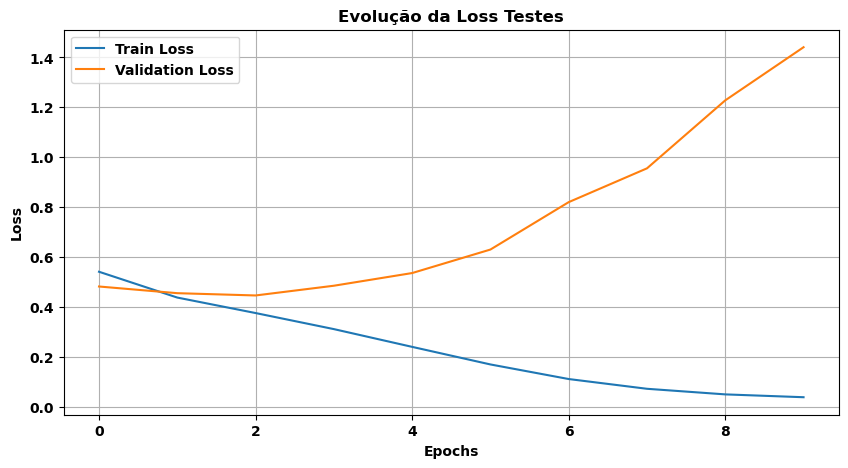

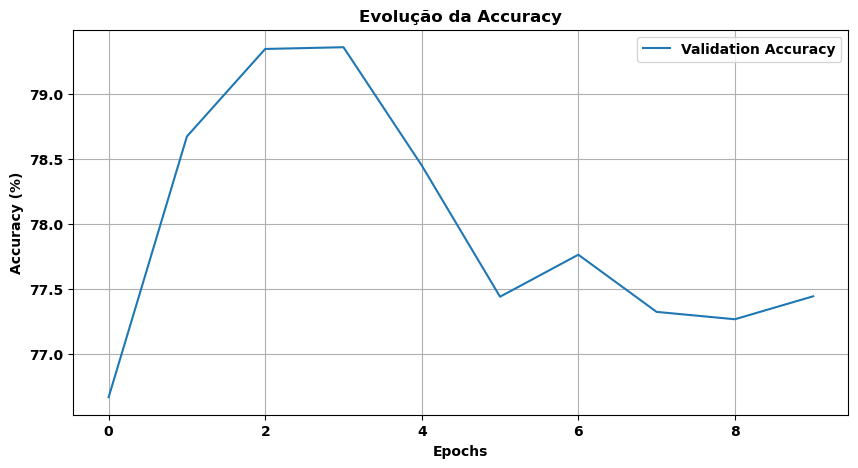

In [117]:
plot_training_curves(train_losses, valid_losses, valid_accuracies)

Os gráficos apresentados acima permitem identificar de forma clara um fenómeno de overfitting no comportamento do modelo ao longo do treino. No gráfico da Loss, observamos que a train loss (erro nos dados de treino) diminui de forma consistente à medida que o número de epoch aumenta, o que indica que o modelo está a aprender e a ajustar-se progressivamente aos dados de treino. No entanto, a validation loss (erro nos dados de validação) começa por diminuir nas primeiras epochs, mas, a partir da terceira, começa a aumentar gradualmente. Esta divergência entre o desempenho em treino e validação demonstra que o modelo está a adaptar-se demasiado aos dados de treino, memorizando padrões específicos em vez de aprender padrões generalizáveis. 

No gráfico da Accuracy, a precisão nos dados de validação melhora até cerca da terceira época, atingindo o seu valor máximo por volta dos 79,2%. A partir daí, a precisão começa a diminuir, apesar de o modelo continuar a melhorar nos dados de treino. Este declínio é mais um indício de que o modelo está a perder capacidade de generalização.


A função pot_sigmoid_predicitons avalia as previsões do modelo sobre um subconjunto dos dados de teste (por defeito, os primeiros 15 exemplos) e representa essas previsões graficamente sobre a curva da função sigmoide. Para cada frase, o modelo calcula a probabilidade de sentimento positivo (valor entre 0 e 1), e essa probabilidade é transformada em logit (valor de entrada da sigmoide) para posicionamento no gráfico. Cada ponto representa uma previsão, sendo desenhado a verde se a previsão estiver correta (isto é, se o rótulo previsto coincide com o real) ou a vermelho se estiver errada.

O gráfico fornece assim uma forma intuitiva de analisar onde o modelo está a acertar ou falhar, não apenas com base na classificação, mas também na confiança da previsão. Por exemplo, um ponto vermelho com probabilidade muito próxima de 0.5 indica incerteza, enquanto erros com previsões muito altas (próximas de 1 ou 0) revelam sobreconfiança em previsões incorretas.

Além da visualização, a função imprime também uma lista de frases com os seus rótulos reais, previsões do modelo e respetivas probabilidades.

In [119]:
def plot_sigmoid_predictions(model, dataset, vocab, tokenizer, device, n=15):
    model.eval()
    scores = []
    targets = []
    colors = []
    samples = []

    with torch.no_grad():
        for i in range(n):
            text_tensor = dataset[i][0]
            label = dataset[i][1].item()
            sentence = dataset.dataframe.iloc[i]["text"]
            targets.append(label)
            samples.append(sentence)

            tokens = tokenizer(sentence)
            token_ids = torch.tensor([vocab[token] for token in tokens], dtype=torch.long).unsqueeze(0).to(device)
            length = torch.tensor([token_ids.shape[1]]).to(device)
            prediction = model(token_ids, length)
            score = prediction.item()
            scores.append(score)

            pred_label = 1 if score >= 0.5 else 0
            colors.append('green' if pred_label == label else 'red')

    # Evitar extremos
    safe_scores = [min(max(p, 1e-6), 1 - 1e-6) for p in scores]
    logits = [np.log(p / (1 - p)) for p in safe_scores]

    # Sigmoide
    x = np.linspace(-10, 10, 100)
    sigmoid = 1 / (1 + np.exp(-x))

    # Plot
    plt.figure(figsize=(12, 6))
    plt.plot(x, sigmoid, label="Função Sigmoide")
    plt.scatter(logits, scores, c=colors, zorder=5)

    for i in range(n):
        plt.annotate(f"{i+1}", (logits[i], scores[i]), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=8)

        real = "Positivo" if targets[i] == 1 else "Negativo"
        pred = "Positivo" if scores[i] >= 0.5 else "Negativo"
        print(f"{i+1}: \"{samples[i]}\" ➔ Previsão: {pred} ({scores[i]:.3f}) | Real: {real}")

    plt.title("Previsões de Sentimentos: Correto (verde) vs Incorreto (vermelho)")
    plt.xlabel("Logit (entrada da sigmoide)")
    plt.ylabel("Probabilidade prevista")
    plt.grid(True)
    plt.legend()
    plt.show()

1: "@vulcansmuse I don't wear shorts either. Or flipflops for that matter...but that's a dance thing. Regardless, we are awesome " ➔ Previsão: Positivo (1.000) | Real: Positivo
2: "OMG I am sooo hungover.  Major head ache, shakes and sweats.   Now I have to somehow work in the kitchen  Such a good night though." ➔ Previsão: Negativo (0.007) | Real: Negativo
3: "gonnaa goo curll my hair and gonna watch a moviee for a few hours(; i lovee youu guyysss &lt;3 andd himmm(; psshh you know whoo youu arre ! " ➔ Previsão: Positivo (1.000) | Real: Positivo
4: "@gone2dmb Hi Denise! Thanks honey! It took me six years! But I'm so happy now... " ➔ Previsão: Positivo (1.000) | Real: Positivo
5: "Set a new standard today and step up! Mine will be Http://www.startingpointbook.com. New look launches today " ➔ Previsão: Positivo (1.000) | Real: Positivo
6: "We aren't going. Last minute cancellation. For those of you at Scrapin, or almost there...twit pics!! Was really looking forward to it " ➔ Previsão: N

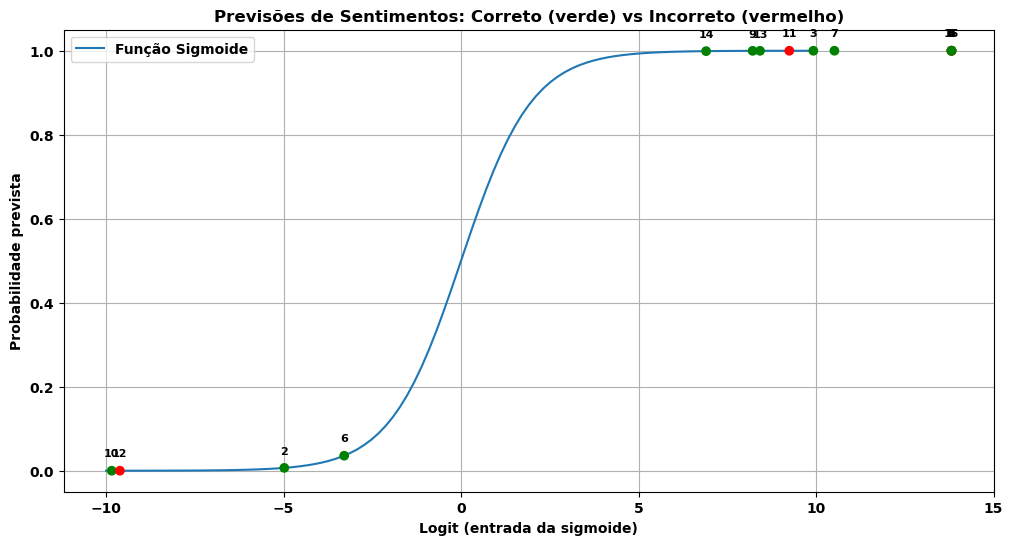

In [120]:
plot_sigmoid_predictions(model, valid_dataset, vocab, tokenizer, device)

Ao analisar as previsões feitas pelo modelo sobre um subconjunto de 15 tweets retirados do conjunto de validação, verifica-se que a maioria dos resultados está corretamente classificada. As mensagens com conteúdo emocional explícito, como alegria, entusiasmo ou frustração, são geralmente bem interpretadas, com valores de probabilidade muito próximos de 1 para sentimentos positivos e próximos de 0 para negativos, o que demonstra confiança do modelo nas suas previsões.

No entanto, há três casos de erro Estes erros sugerem que o modelo ainda tem dificuldades em lidar com sarcasmo, ironia e linguagem ambígua, aspetos comuns em linguagem natural, especialmente em tweets.

Em resumo, o modelo apresenta boa capacidade de generalização, com elevada confiança nas previsões corretas, mas revela fragilidades em frases com duplo sentido ou com emoções mistas, onde pode beneficiar de estratégias mais avançadas de pré-processamento, embeddings contextualizados ou modelos com atenção.


---

Como se tinha verificado que o modelo apresentava sinais claros de overfitting, implementou-se abaixo a técnica de early stopping, com o objetivo de monitorizar a validation loss e interromper o treino assim que esta deixasse de melhorar. Desta forma, é possível preservar o modelo num ponto mais equilibrado entre aprendizagem e generalização, evitando que continue a assimilar ruído dos dados de treino e, consequentemente, comprometa o seu desempenho quando aplicado a dados reais como também otimização de recursos.

In [124]:
def train_and_evaluate_with_early_stop(model, train_loader, valid_loader, optimizer, criterion, device, epochs=10, patience=3):
    best_valid_loss = float('inf')
    train_losses, valid_losses, valid_accuracies = [], [], []
    epochs_no_improve = 0

    for epoch in range(epochs):
        start_time = time.time()

        train_loss = train_model(model, train_loader, optimizer, criterion, device)
        valid_loss, valid_acc = evaluate_model(model, valid_loader, criterion, device)

        train_losses.append(train_loss)
        valid_losses.append(valid_loss)
        valid_accuracies.append(valid_acc)

        elapsed_time = time.time() - start_time

        print(f"Epoch {epoch+1}/{epochs} | Time: {elapsed_time:.2f}s")
        print(f"  → Train Loss: {train_loss:.4f}")
        print(f"  → Valid Loss: {valid_loss:.4f} | Valid Acc: {valid_acc*100:.2f}%")
        print("-" * 50)

        # EARLY STOPPING
        if valid_loss < best_valid_loss:
            best_valid_loss = valid_loss
            best_model_state = model.state_dict()
            epochs_no_improve = 0
        else:
            epochs_no_improve += 1
            if epochs_no_improve >= patience:
                print(f"Early stopping ativado após {epoch+1} epoch.")
                break

    # Restaurar o melhor modelo
    model.load_state_dict(best_model_state)
    print("Treino com early stopping concluído!")

    return train_losses, valid_losses, valid_accuracies


 A função `train_and_evaluate_with_early_stop` implementa o processo de treino de modelo anterior mas com a tecnica de early stopp, que interrompe automaticamente o treino caso a perda de validação (validation loss) deixe de melhorar durante um número consecutivo de epochs (definido pelo patience). 

 Este técnica é particularmente útil para evitar que o modelo continue a treinar após atingir o ponto ótimo de generalização, o que ajuda a reduzir o risco de overfitting e a diminuir o tempo de treino.

 Os hiperparaemtros foram mantidos  como também o otimizador e função de perda.

In [125]:
model = LSTMClassifier(
    vocab_size=VOCAB_SIZE,
    embedding_dim=EMBEDDING_DIM,
    hidden_dim=HIDDEN_DIM,
    output_dim=OUTPUT_DIM,
    n_layers=N_LAYERS,
    bidirectional=BIDIRECTIONAL,
    dropout=DROPOUT,
    pad_idx=pad_idx
).to(device)

In [126]:
optimizer = optim.Adam(model.parameters())
criterion = nn.BCELoss()


In [127]:
# Treinar com early stopping
train_losses_es, valid_losses_es, valid_accuracies_es = train_and_evaluate_with_early_stop(
    model,
    train_loader,
    valid_loader,
    optimizer,
    criterion,
    device,
    epochs=10,
    patience=2
)


Epoch 1/10 | Time: 629.17s
  → Train Loss: 0.5409
  → Valid Loss: 0.4779 | Valid Acc: 76.91%
--------------------------------------------------
Epoch 2/10 | Time: 640.99s
  → Train Loss: 0.4370
  → Valid Loss: 0.4538 | Valid Acc: 78.55%
--------------------------------------------------
Epoch 3/10 | Time: 636.20s
  → Train Loss: 0.3740
  → Valid Loss: 0.4461 | Valid Acc: 79.33%
--------------------------------------------------
Epoch 4/10 | Time: 637.73s
  → Train Loss: 0.3106
  → Valid Loss: 0.4756 | Valid Acc: 79.52%
--------------------------------------------------
Epoch 5/10 | Time: 636.85s
  → Train Loss: 0.2408
  → Valid Loss: 0.5443 | Valid Acc: 78.54%
--------------------------------------------------
Early stopping ativado após 5 epoch.
Treino com early stopping concluído!


Nas primeiras três epochs, observa-se uma melhoria clara tanto na train loss como na validation loss, assim como na precisão da validação (valid accuracy), o que indica que o modelo está a aprender eficazmente e a generalizar bem.

Contudo, nas epochs seguintes, apesar de a train loss continuar a diminuir, a validation loss começa a aumentar (de 0.4461 para 0.5443), enquanto a valid accuracy estagna ou piora ligeiramente. Este padrão sugere que o modelo está a especializar-se em demasia nos dados de treino, perdendo capacidade de generalização. A ativação do early stopping após a quinta época evita que esse sobreajuste se acentue, interrompendo o treino no momento em que o desempenho em validação começa a degradar-se.

Em suma, o early stopping funcionou como mecanismo eficaz de regularização, terminando o treino antes que o modelo aprendesse ruído desnecessário, mantendo assim um melhor equilíbrio entre desempenho e generalização.

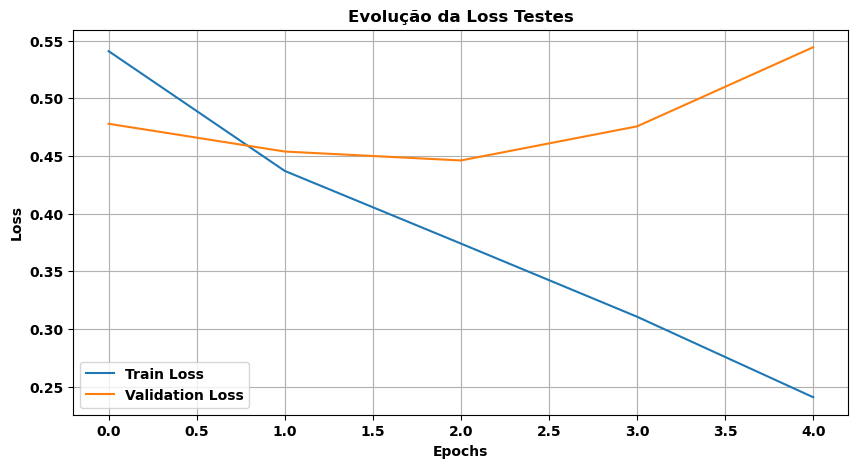

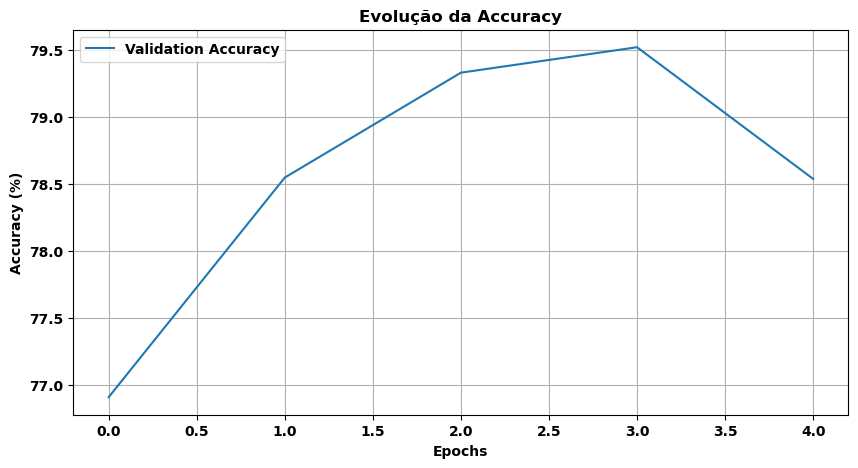

In [128]:
plot_training_curves(train_losses_es, valid_losses_es, valid_accuracies_es)


Inicialmente sem "early stop" modelo foi treinado durante as 10 epochs. Apesar da perda de treino (train loss) ter descido de forma significativa até atingir 0.0354, a perda de validação (validation loss) começou a aumentar a partir da 4.ª iteração, passando de 0.4432 para 1.3836 na última. Indicando overfitting onde o modelo deixou de aprender padrões úteis e começou a memorizar os dados de treino.

Com a técnica de early stopping ativada, o treino foi interrompido automaticamente na 5.ª epoch, após 2 épocas consecutivas sem melhoria significativa no validation loss (patience = 2). A valid accuracy manteve-se competitiva (78.13%) e dentro do intervalo das melhores épocas do treino completo.

Esta tecnica  permitiu preservar o desempenho do modelo, interrompendo o treino poupando tempo computacional e produzindo um modelo mais generalizável. 

1: "@vulcansmuse I don't wear shorts either. Or flipflops for that matter...but that's a dance thing. Regardless, we are awesome " ➔ Previsão: Positivo (0.978) | Real: Positivo
2: "OMG I am sooo hungover.  Major head ache, shakes and sweats.   Now I have to somehow work in the kitchen  Such a good night though." ➔ Previsão: Negativo (0.007) | Real: Negativo
3: "gonnaa goo curll my hair and gonna watch a moviee for a few hours(; i lovee youu guyysss &lt;3 andd himmm(; psshh you know whoo youu arre ! " ➔ Previsão: Positivo (0.991) | Real: Positivo
4: "@gone2dmb Hi Denise! Thanks honey! It took me six years! But I'm so happy now... " ➔ Previsão: Positivo (0.993) | Real: Positivo
5: "Set a new standard today and step up! Mine will be Http://www.startingpointbook.com. New look launches today " ➔ Previsão: Positivo (0.999) | Real: Positivo
6: "We aren't going. Last minute cancellation. For those of you at Scrapin, or almost there...twit pics!! Was really looking forward to it " ➔ Previsão: N

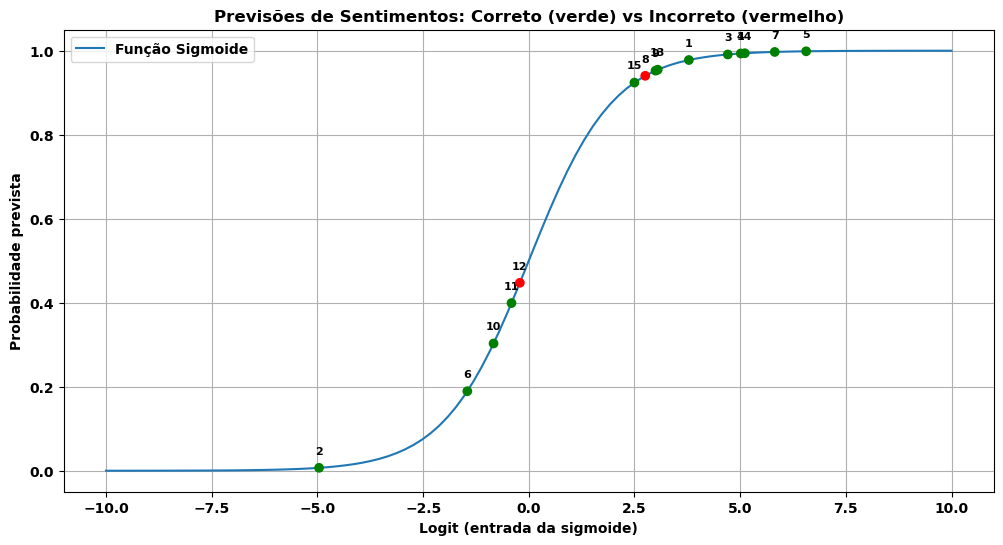

In [130]:
plot_sigmoid_predictions(model, valid_dataset, vocab, tokenizer, device)

A comparação entre os resultados com e sem early stopping permite tirar algumas conclusões relevantes sobre o comportamento dos modelos em termos de generalização.

Existe pequenas diferenças nos scores e em algumas classificações, o modelo sem early stopping tende a produzir previsões mais extremas (próximas de 0.0 ou 1.0), o que pode indicar uma maior confiança, mas também um potencial sobreajuste aos dados de treino. Já o modelo com early stopping mostra previsões mais moderadas (ex: 0.94, 0.953, 0.303...), refletindo uma atitude mais conservadora e potencialmente melhor capacidade de generalização.

Por exemplo:

A frase **11 ("@bdawg123456 i know!! U r never on twitter anymore!!!...")** foi incorretamente classificada como Positiva (1.000) no modelo sem early stop, mas corretamente como Negativa (0.399) no modelo com early stop.

A frase **12 ("I like making people jealous...")** foi incorretamente classificada como Negativa nos dois casos, mas o modelo com early stop atribuiu um score muito mais próximo do limiar (0.447), sugerindo dúvida, o que é coerente dada a ambiguidade da frase.

Assim, apesar de ambos os modelos cometerem erros, o modelo com early stopping tende a ter maior nuance na avaliação, mostrando maior sensibilidade e reforçando a utilidade da técnica de early stopping na ajuda a preservar a capacidade de generalização do modelo sem comprometer fortemente a sua performance.

Concluindo que é possível constatar que ambos os modelos apresentam um desempenho satisfatório na tarefa de classificação de sentimentos em tweets. No entanto, algumas diferenças tornam-se evidentes.

O modelo sem early stopping, embora tenha atingido uma ligeira melhoria na accuracy em algumas epochs, demonstrou claros sinais de overfitting, evidenciados pelo aumento progressivo da validation loss nas últimas iterações. Este comportamento indica que o modelo estava a ajustar-se demasiado aos dados de treino, perdendo capacidade de generalização.

Por outro lado, o modelo com early stopping, ao interromper o treino assim que a validation loss deixou de melhorar durante duas epochs consecutivas, conseguiu preservar um equilíbrio mais saudável entre aprendizagem e generalização. Isso refletiu-se num comportamento mais conservador na fase de inferência, atribuindo pontuações menos extremas.

Apesar das vantagens do early stopping, ambos os modelos revelaram limitações na interpretação de frases com sarcasmo, ironia ou tons ambíguos, o que é expectável numa arquitetura baseada em LSTM com tokenização simples. Este tipo de nuance semântica poderá beneficiar, em trabalhos futuros, de abordagens mais sofisticadas, como embeddings contextualizados (ex.: BERT) e tokenizadores mais avançados como spacy.


---